# ipywidgets tutorial

## Useful Resources

- Using interact ([English](http://nbviewer.jupyter.org/github/melund/ipython/blob/master/examples/Interactive%20Widgets/Using%20Interact.ipynb#), [Japanese](http://nbviewer.jupyter.org/gist/tanemaki/de772cdbea35db2d9a23#))
- [ipywidgets @ GitHub](https://github.com/ipython/ipywidgets)
- [Static Interactive Widgets for IPython Notebooks](https://jakevdp.github.io/blog/2013/12/05/static-interactive-widgets/)
- [IPythonでクリクリできる図を作ろう](http://qiita.com/tanemaki/items/e965cd9c25acbeed860c)

## Introduction to widgets in ipython

Load necessary modules.

In [1]:
from __future__ import print_function

# New syntax
from ipywidgets import interact, interactive, fixed, widgets

# Old syntax
# from IPython.html.widgets import interact, interactive, fixed
# from IPython.html import widgets

Define a function you would like to interact.

In [2]:
def f(x):
    print(x)

Pass the function you would like to interact to the first argument of the `interact` function. Second argument can take either a widget abbreviation or a widget instance.

In [3]:
# Using a widget abbreviation
interact(f, x=(-10, 10, 2));

0


The following code and the previous code do exactly the same thing.

In [4]:
# Using a widget instance
interact(f, x=widgets.IntSlider(min=-10, max=10, step=2, value=8))

8


<function __main__.f>

If you would like to specify the initial value, you can also use `interact` as a decorator.

In [5]:
@interact(x=(-10, 10, 2))
def g(x=8):
    print(x)

8


Here is a list of some widgets. For the keyword argument of `interact` function, you can pass either a widget abbereviation or a widget instance.

| Widget Abbreviation | Widget Instance |
|:-- |:--|
| `True` or `False` | `Checkbox` |
| `'Hello World!'` | `Textarea` |
| Interger value or `(min,max)` or `(min,max,step)` | 	 `IntSlider` |
| Float value or `(min,max)` or `(min,max,step)` |	 `FloatSlider` |
| `('orange','apple')` or `{'one':1,'two':2}`|	`Dropdown` |

In [6]:
interact(f, x=True)

True


<function __main__.f>

In [7]:
interact(f, x="Hello world!")

Hello world!


<function __main__.f>

In [8]:
interact(f, x=('orange', 'apple', 'grape'))

orange


<function __main__.f>

### Fixing arguments using `fixed`

In [9]:
def h(p, q):
    print(p, q)

interact(h, p=10, q=fixed(20))

10 20


<function __main__.h>

### Using `interactive`

- `interact`: value specification and plotting are entangled
- `interactive`:  value specification and plotting are separeted

In [10]:
def f(a, b):
    return a + b

In [11]:
w = interactive(f, a=10, b=20)

In [12]:
type(w)

ipywidgets.widgets.widget_box.Box

In [13]:
w.children

(<ipywidgets.widgets.widget_int.IntSlider at 0x107c437d0>,
 <ipywidgets.widgets.widget_int.IntSlider at 0x107c43850>)

In [14]:
from IPython.display import display
display(w)

30

In [15]:
w.kwargs

{'a': 10, 'b': 20}

In [16]:
w.result

30

## Example 1: Sinusoidal wave

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

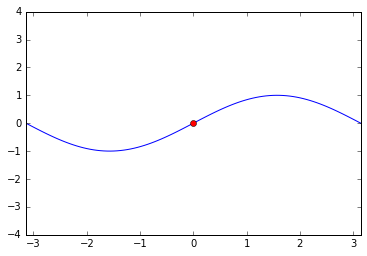

In [18]:
@interact(amp=(0.1, 4.0, 0.1), omega=(0.1, 4.0, 0.1), phase=(-np.pi, np.pi, 0.1), 
          fn = OrderedDict((('sin', np.sin), ('cos', np.cos), ('tan', np.tan))))
def h(amp=1.0, omega=1.0, phase=0.0, fn=np.sin):
    domain=[-np.pi, np.pi]
    x = np.linspace(domain[0], domain[1], 100)
    y  = amp * fn(omega * x + phase)
    plt.plot(x, y)
    plt.plot(-phase/omega, 0, 'or')
    plt.xlim(domain)
    plt.ylim([-4, 4])

## Example 2: Taylor expansion

\begin{align}
f(x) &= \sum_{n=0}^{\infty} \frac{f^{(n)}(x_{0})}{n!} (x - x_{0})^{n} \\
f(x) &= \frac{f^{(0)}(x_{0})}{0!}(x - x_{0})^{0} + \frac{f^{(1)}(x_{0})}{1!}(x - x_{0})^{1} + \frac{f^{(2)} (x_{0})}{2!}  (x - x_{0})^{2} + \frac{f^{(3)} (x_{0})}{3!}  (x - x_{0})^{3} + \cdots \\
&=f(x_{0}) + f^{(1)}(x_{0})(x - x_{0}) + \frac{f^{(2)} (x_{0})}{2!}  (x - x_{0})^{2} + \frac{f^{(3)} (x_{0})}{3!}  (x - x_{0})^{3} + \cdots
\end{align}

### Particular equation

\begin{align}
f(x) &= 0.05 x^{4} + 0.2 x^{3} - 0.3 x^{2} - 2.0 x + 5.0 \\
\end{align}

\begin{align}
f^{(0)}(x) &= f(x) = 0.05 x^{4} + 0.2 x^{3} - 0.3 x^{2} - 2.0 x + 5.0 \\
f^{(1)}(x) &= 0.2 x^{3} + 0.6 x^{2} - 0.6 x - 2.0 \\
f^{(2)}(x) &= 0.6 x^{2} + 1.2 x - 0.6 \\
f^{(3)}(x) &= 1.2 x + 1.2 \\
f^{(4)}(x) &= 1.2\\
\end{align}

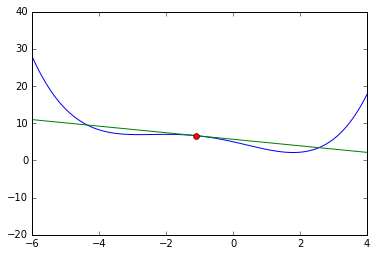

In [19]:
@interact(x0 = (-6, 4, 0.1), order=widgets.Dropdown(options=['1st', '2nd', '3rd', '4th'], value='1st'))
def f(x0, order):
    xs = np.linspace(-6, 4, 100);
    f = lambda x: 0.05 * x ** 4 + 0.2 * x ** 3 - 0.3 * x ** 2 - 2.0 * x + 5
    f1 = lambda x: 0.2 * x ** 3 + 0.6 * x ** 2 - 0.6 * x - 2.0
    f2 = lambda x: 0.6 * x ** 2 + 1.2 * x - 0.6
    f3 = lambda x: 1.2 * x + 1.2
    f4 = lambda x: 1.2
    plt.plot(xs, f(xs))
    if order == '1st':
        # 1st order Taylor expansion
        plt.plot(xs, f(x0) + f1(x0) * (xs - x0))
    elif order == '2nd':
        # 2nd order Taylor expansion
        plt.plot(xs, f(x0) + f1(x0) * (xs - x0) + 0.5 * f2(x0) * (xs - x0) ** 2)
    elif order == '3rd':
        # 3rd order Taylor expansion
        plt.plot(xs, f(x0) + f1(x0) * (xs - x0) + 0.5 * f2(x0) * (xs - x0) ** 2 + (1.0 / 6.0) *  f3(x0) * (xs - x0) ** 3)
    elif order == '4th':
        # 4th order Taylor expansion
        plt.plot(xs, f(x0) + f1(x0) * (xs - x0) + 0.5 * f2(x0) * (xs - x0) ** 2 + (1.0 / 6.0) *  f3(x0) * (xs - x0) ** 3 + (1.0 / 24.0) * f4(x0) * (xs - x0) ** 4)
    plt.plot(x0, f(x0), 'ro')
    plt.ylim(-20, 40)